In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Classification number setting

In [3]:
NUM_CLASSES = 4

# input length

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# Load learning data

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# callback for early abort
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
30/32 [===========================>..] - ETA: 0s - loss: 1.3746 - accuracy: 0.4432 
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 1s 11ms/step - loss: 1.3745 - accuracy: 0.4449 - val_loss: 1.3630 - val_accuracy: 0.5249
Epoch 2/1000
24/32 [=====================>........] - ETA: 0s - loss: 1.3557 - accuracy: 0.4818
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 1.3519 - accuracy: 0.4892 - val_loss: 1.3355 - val_accuracy: 0.6005
Epoch 3/1000
25/32 [======================>.......] - ETA: 0s - loss: 1.3249 - accuracy: 0.5203
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 1.3210 - accuracy: 0.5264 - val_loss: 1.2975 - val_accuracy: 0.6458
Epoch 4/1000
28/32 [=========================>....] - ETA: 0s - l

20/32 [=================>............] - ETA: 0s - loss: 0.5265 - accuracy: 0.8129
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.5190 - accuracy: 0.8087 - val_loss: 0.2719 - val_accuracy: 0.9509
Epoch 54/1000
19/32 [================>.............] - ETA: 0s - loss: 0.5234 - accuracy: 0.7965
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 7ms/step - loss: 0.5036 - accuracy: 0.8094 - val_loss: 0.2701 - val_accuracy: 0.9517
Epoch 55/1000
24/32 [=====================>........] - ETA: 0s - loss: 0.4956 - accuracy: 0.8232
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 5ms/step - loss: 0.4971 - accuracy: 0.8212 - val_loss: 0.2657 - val_accuracy: 0.9532
Epoch 56/1000
18/32 [===============>..............] - ETA: 0s - loss: 0.51

27/32 [========================>.....] - ETA: 0s - loss: 0.4320 - accuracy: 0.8411
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4297 - accuracy: 0.8424 - val_loss: 0.2268 - val_accuracy: 0.9637
Epoch 106/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.4535 - accuracy: 0.8287
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.8328 - val_loss: 0.2253 - val_accuracy: 0.9630
Epoch 107/1000
21/32 [==================>...........] - ETA: 0s - loss: 0.4560 - accuracy: 0.8400
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.8379 - val_loss: 0.2247 - val_accuracy: 0.9637
Epoch 108/1000
29/32 [==========================>...] - ETA: 0s - loss

21/32 [==================>...........] - ETA: 0s - loss: 0.4399 - accuracy: 0.8411
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.8401 - val_loss: 0.2059 - val_accuracy: 0.9653
Epoch 158/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4498 - accuracy: 0.8672
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8414 - val_loss: 0.2074 - val_accuracy: 0.9645
Epoch 159/1000
24/32 [=====================>........] - ETA: 0s - loss: 0.4283 - accuracy: 0.8389
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4260 - accuracy: 0.8406 - val_loss: 0.2042 - val_accuracy: 0.9668
Epoch 160/1000
 1/32 [..............................] - ETA: 0s - loss

30/32 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.8354
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.8356 - val_loss: 0.1946 - val_accuracy: 0.9675
Epoch 210/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8438
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4357 - accuracy: 0.8432 - val_loss: 0.1918 - val_accuracy: 0.9675
Epoch 211/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4339 - accuracy: 0.8594
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8505 - val_loss: 0.1929 - val_accuracy: 0.9675
Epoch 212/1000
28/32 [=========================>....] - ETA: 0s - loss

20/32 [=================>............] - ETA: 0s - loss: 0.4114 - accuracy: 0.8430
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 5ms/step - loss: 0.4292 - accuracy: 0.8406 - val_loss: 0.1781 - val_accuracy: 0.9698
Epoch 262/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.4093 - accuracy: 0.8455
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4073 - accuracy: 0.8467 - val_loss: 0.1800 - val_accuracy: 0.9675
Epoch 263/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.3975 - accuracy: 0.8527
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4074 - accuracy: 0.8459 - val_loss: 0.1798 - val_accuracy: 0.9690
Epoch 264/1000
27/32 [========================>.....] - ETA: 0s - loss

22/32 [===================>..........] - ETA: 0s - loss: 0.3863 - accuracy: 0.8633
Epoch 313: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.8620 - val_loss: 0.1708 - val_accuracy: 0.9698
Epoch 314/1000
24/32 [=====================>........] - ETA: 0s - loss: 0.3825 - accuracy: 0.8597
Epoch 314: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.8610 - val_loss: 0.1703 - val_accuracy: 0.9705
Epoch 315/1000
24/32 [=====================>........] - ETA: 0s - loss: 0.4149 - accuracy: 0.8470
Epoch 315: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8472 - val_loss: 0.1747 - val_accuracy: 0.9698
Epoch 316/1000
29/32 [==========================>...] - ETA: 0s - loss

24/32 [=====================>........] - ETA: 0s - loss: 0.3950 - accuracy: 0.8568
Epoch 365: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.3996 - accuracy: 0.8585 - val_loss: 0.1661 - val_accuracy: 0.9690
Epoch 366/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.4136 - accuracy: 0.8505
Epoch 366: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8482 - val_loss: 0.1701 - val_accuracy: 0.9705
Epoch 367/1000
30/32 [===========================>..] - ETA: 0s - loss: 0.4085 - accuracy: 0.8443
Epoch 367: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.8437 - val_loss: 0.1704 - val_accuracy: 0.9698
Epoch 368/1000
 1/32 [..............................] - ETA: 0s - loss

In [13]:
# Loading saved models
model = tf.keras.models.load_model(model_save_path)

In [14]:
# reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 79ms/step
[0.9378487  0.01602383 0.01683505 0.02929242]
0


# mixed ranks

42/42 [==============================] - 0s 1ms/step


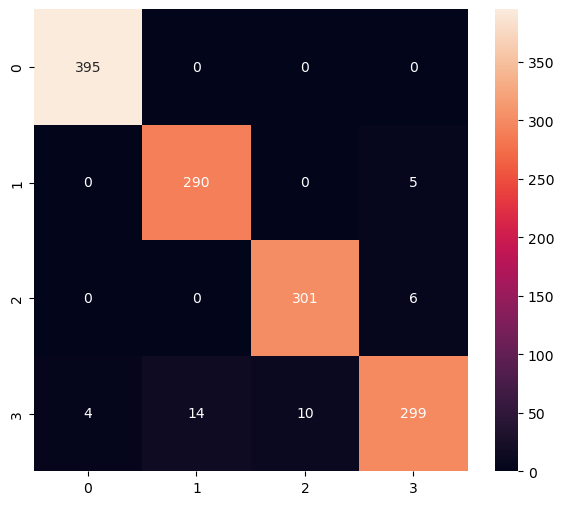

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.95      0.98      0.97       295
           2       0.97      0.98      0.97       307
           3       0.96      0.91      0.94       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用 Convert to model for

In [28]:
# Save as inference-only model
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\crsho\AppData\Local\Temp\tmpo7rg_iol\assets


6432

# reasoning test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference execution
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 994 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.93784875 0.01602383 0.01683505 0.02929242]
0
